In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
Data = pd.read_csv('credit_risk_dataset.csv', sep=';')
Data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
# Copie des données originales
cleaned_df = Data.copy()

# Gestion des valeurs manquantes sur les colonnes numériques par la médiane
numeric_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
for col in numeric_features:
    cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].median())

# Gestion des valeurs manquantes sur les variables catégorielles en les remplaçant par une valeur 'Missing'
for col in cat_cols:
    cleaned_df[col] = cleaned_df[col].fillna('Missing')

# Transformation des variables catégorielles en variables numériques via one-hot encoding
cleaned_df = pd.get_dummies(cleaned_df, columns = cat_cols, drop_first=False)

# Normalisation des données pour les colonnes numériques (on exclut ici 'loan_status' si c'est la variable cible)
# Vérifier que la variable cible n'est pas incluse dans le scaling si nécessaire
scaled_features = numeric_features  # 'loan_status' n'est pas dans cette liste
cleaned_df[scaled_features] = scaler.fit_transform(cleaned_df[scaled_features])

# Affichage d'un aperçu du DataFrame nettoyé
cleaned_df.head(50)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,-0.903374,-0.114143,28.926614,4.019404,1.625921,1,3.931411,-0.691554,False,False,...,False,False,False,False,True,False,False,False,False,True
1,-1.060904,-0.911147,0.056763,-1.358650,0.042310,0,-0.657458,-0.938167,False,False,...,False,False,True,False,False,False,False,False,True,False
2,-0.430783,-0.911147,-0.921876,-0.646849,0.603713,1,3.744110,-0.691554,True,False,...,False,False,False,True,False,False,False,False,True,False
3,-0.745843,-0.009274,-0.187897,4.019404,1.369558,1,3.369508,-0.938167,False,False,...,False,False,False,True,False,False,False,False,True,False
4,-0.588313,-0.188358,0.790742,4.019404,1.058028,1,3.556809,-0.444942,False,False,...,False,False,False,True,False,False,False,False,False,True
5,-1.060904,-0.906307,-0.677217,-1.121383,-1.255733,1,0.747297,-0.938167,False,False,...,True,True,False,False,False,False,False,False,True,False
6,-0.273252,0.177876,0.790742,4.019404,0.457683,1,2.620305,-0.691554,False,False,...,False,False,True,False,False,False,False,False,True,False
7,-0.588313,0.207820,0.056763,4.019404,0.032574,1,2.526655,-0.444942,False,False,...,False,False,True,False,False,False,False,False,True,False
8,-0.588313,0.273065,0.790742,4.019404,-0.684594,1,2.339354,-0.938167,False,False,...,False,True,False,False,False,False,False,False,True,False
9,-1.060904,-0.904693,0.301422,-1.263743,1.210548,1,-0.095556,-0.691554,False,False,...,True,False,False,False,True,False,False,False,True,False


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Ensemble d'entraînement :", X_train.shape, y_train.shape)
print("Ensemble de test :", X_test.shape, y_test.shape)

Ensemble d'entraînement : (26064, 22) (26064,)
Ensemble de test : (6517, 22) (6517,)


## 2️- Analyse Exploratoire des Données (EDA) et Visualisation

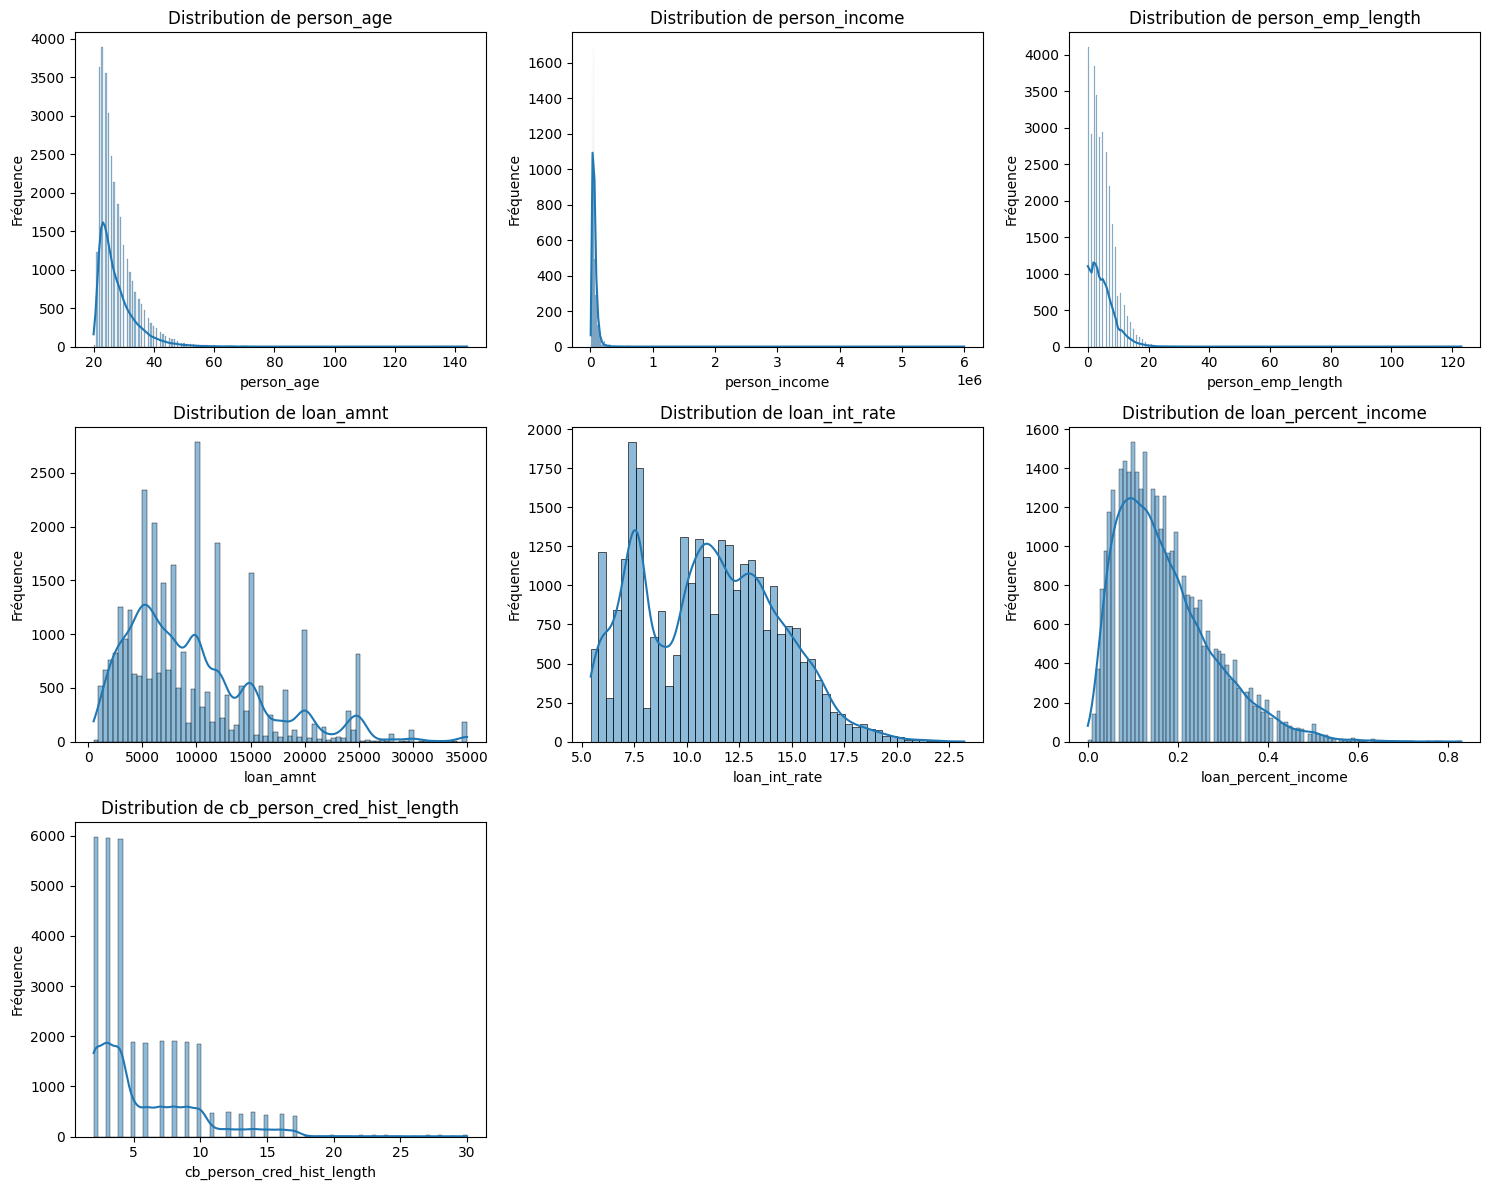

In [15]:
# Étude de la distribution des variables numériques
# On va créer des histogrammes avec la courbe de densité pour chaque variable numérique d'intérêt.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.histplot(Data[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Fréquence")

# Supprimer les axes inutilisés s'il y en a de restants
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

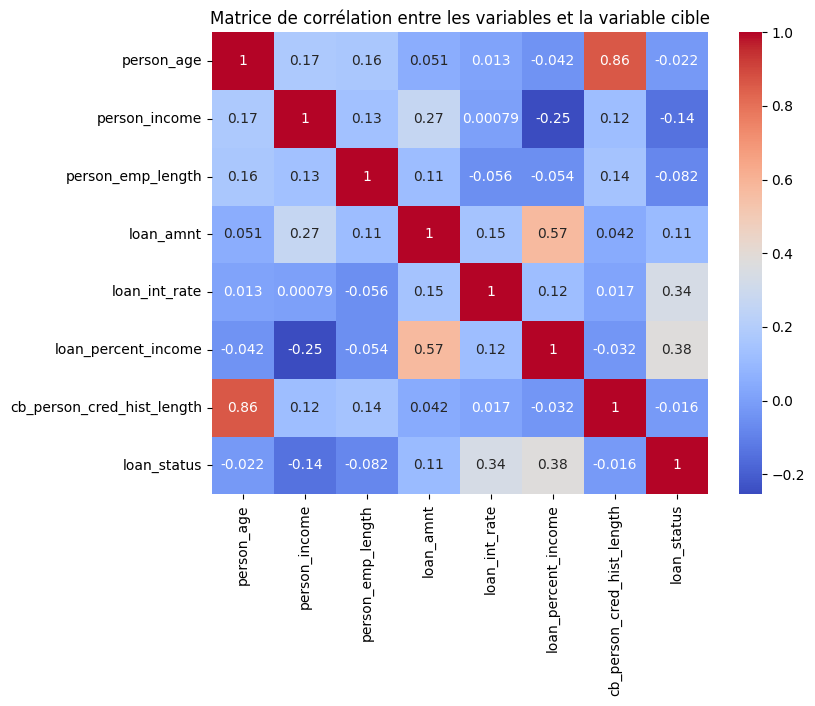

In [ ]:
# Calcul de la matrice de corrélation pour les variables numériques et la variable cible 'loan_status'
features = numeric_features + ['loan_status']
corr_matrix = Data[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation entre les variables et la variable cible")
plt.show()

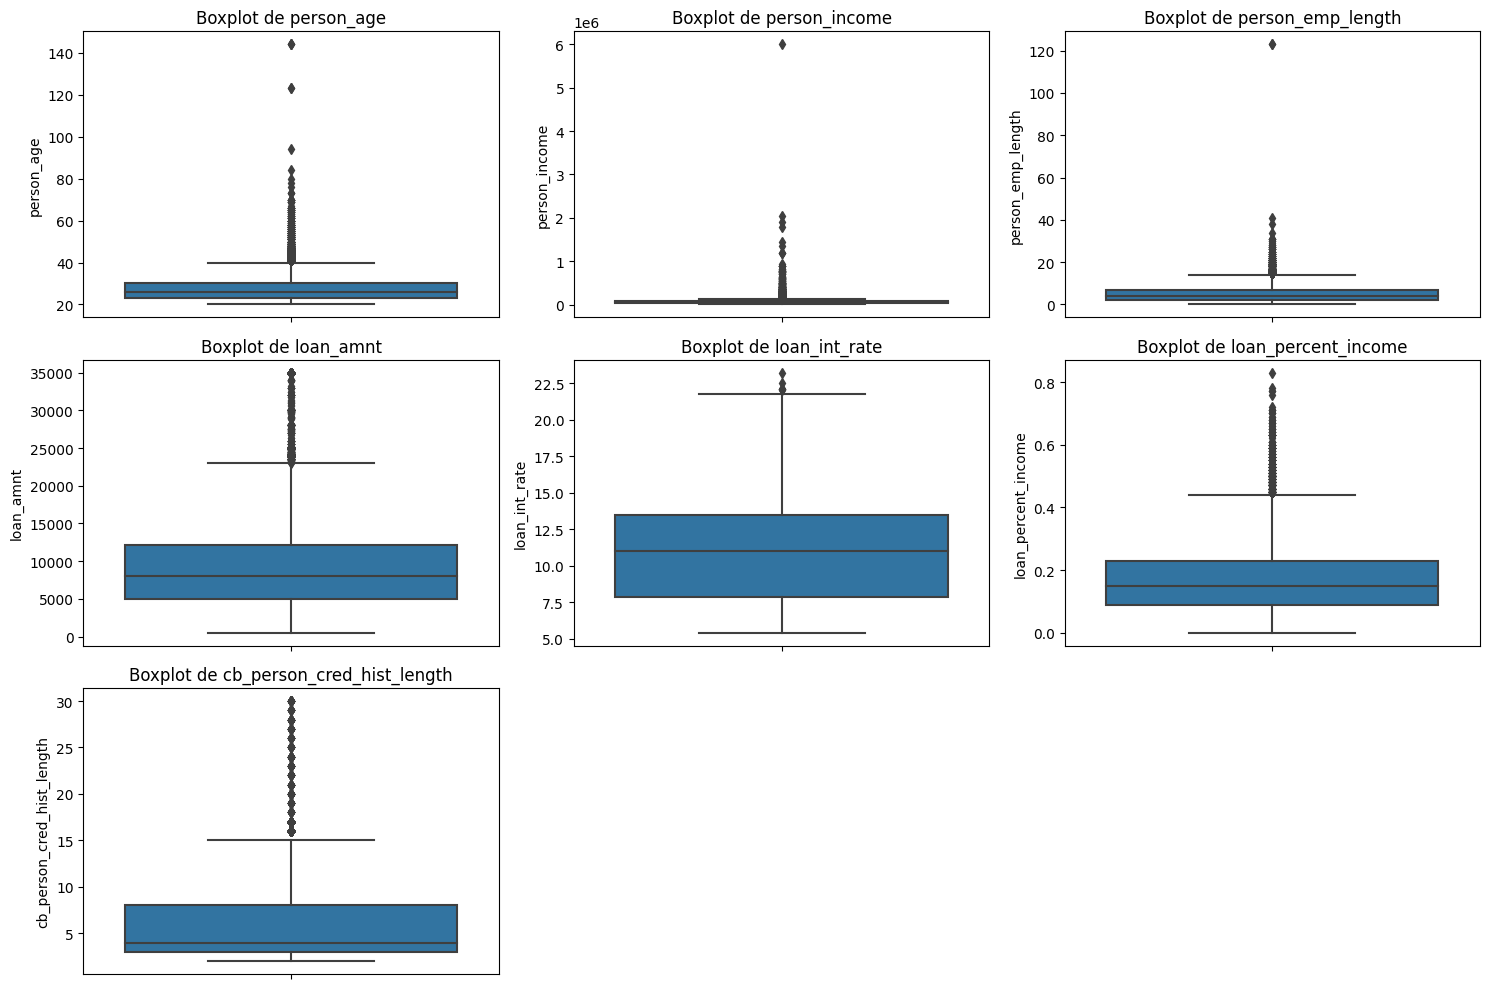

In [17]:
# Visualisations des tendances avec matplotlib et seaborn

# 1. Boxplots pour les variables numériques
plt.figure(figsize=(15, 10))
for idx, col in enumerate(numeric_features):
    plt.subplot(3, 3, idx + 1)
    sns.boxplot(y=Data[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

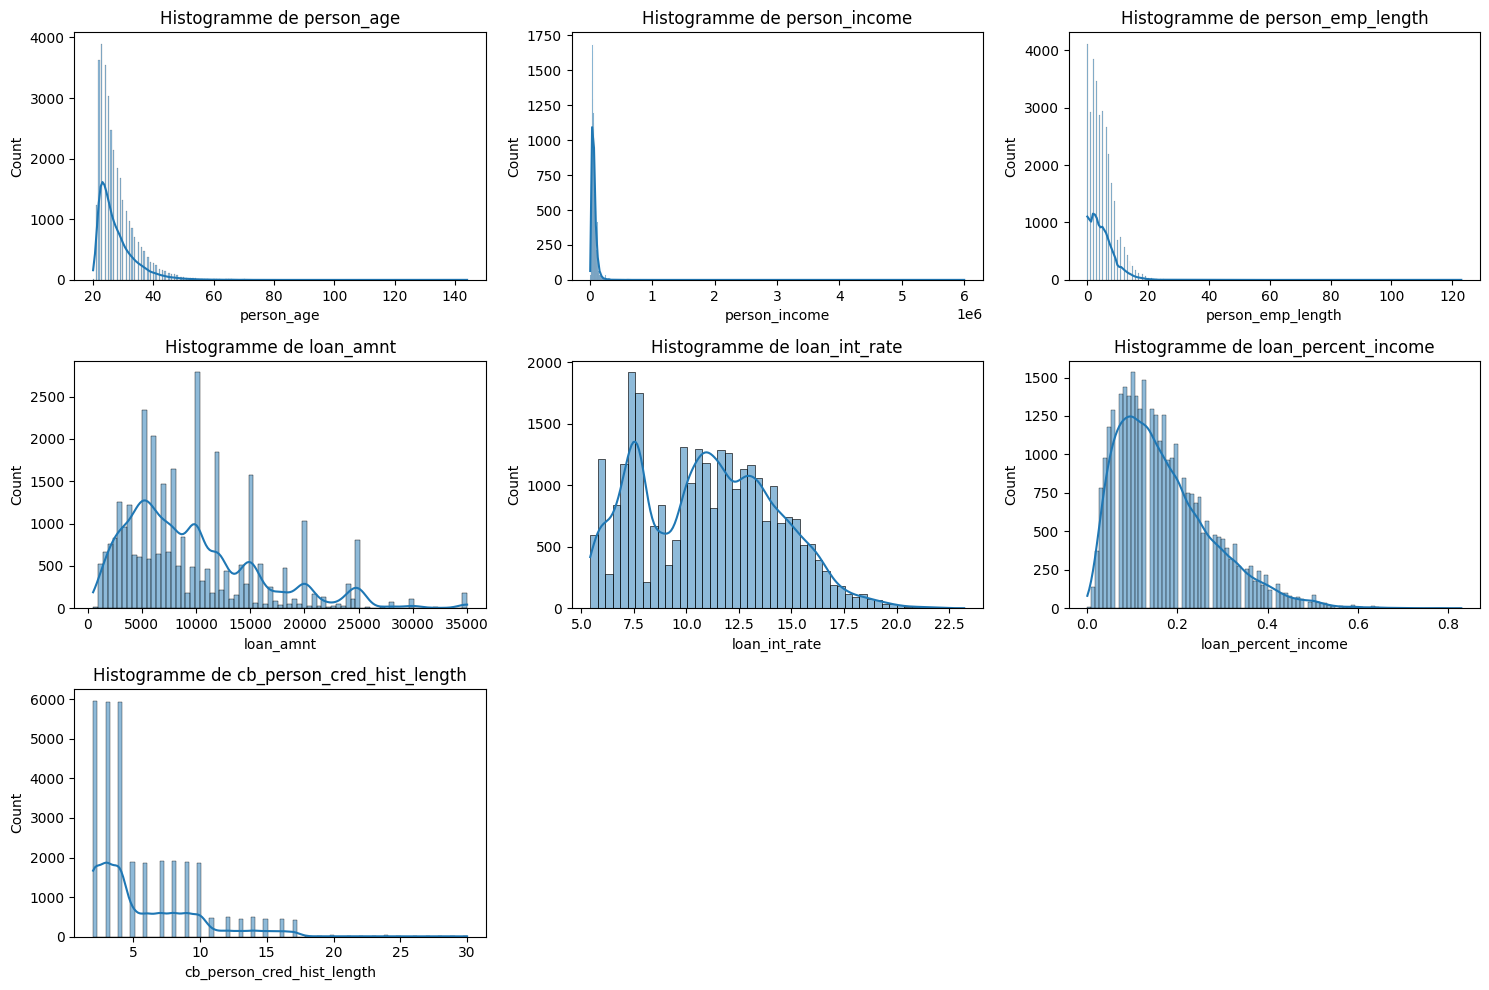

In [ ]:
# 2. Histogrammes des variables numériques
plt.figure(figsize=(15, 10))
for idx, col in enumerate(numeric_features):
    plt.subplot(3, 3, idx + 1)
    sns.histplot(Data[col], kde=True)
    plt.title(f"Histogramme de {col}")
plt.tight_layout()
plt.show()

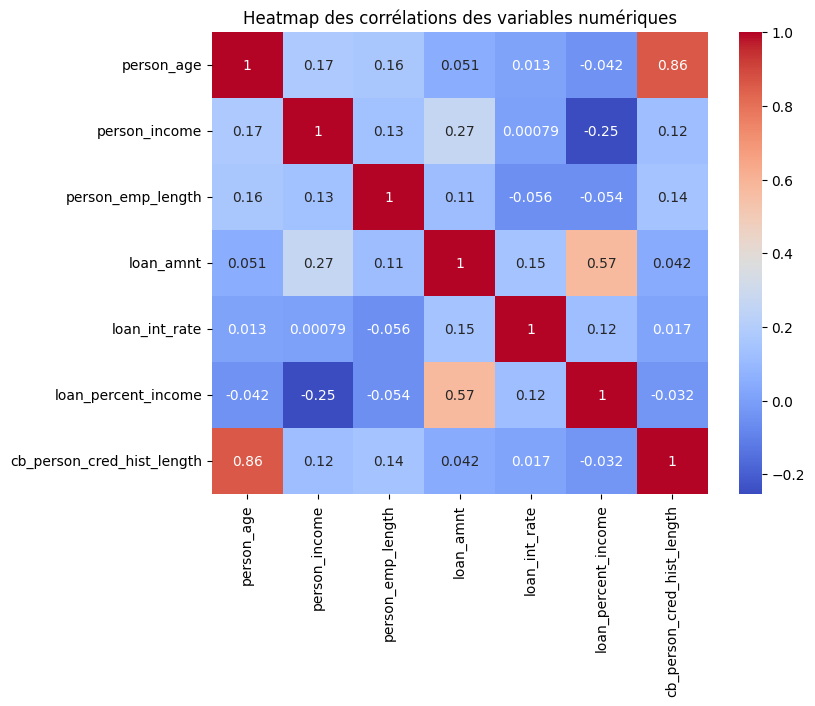

In [19]:
# 3. Heatmap de la matrice de corrélation des variables numériques
corr_matrix_numeric = Data[numeric_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_numeric, annot=True, cmap='coolwarm')
plt.title("Heatmap des corrélations des variables numériques")
plt.show()

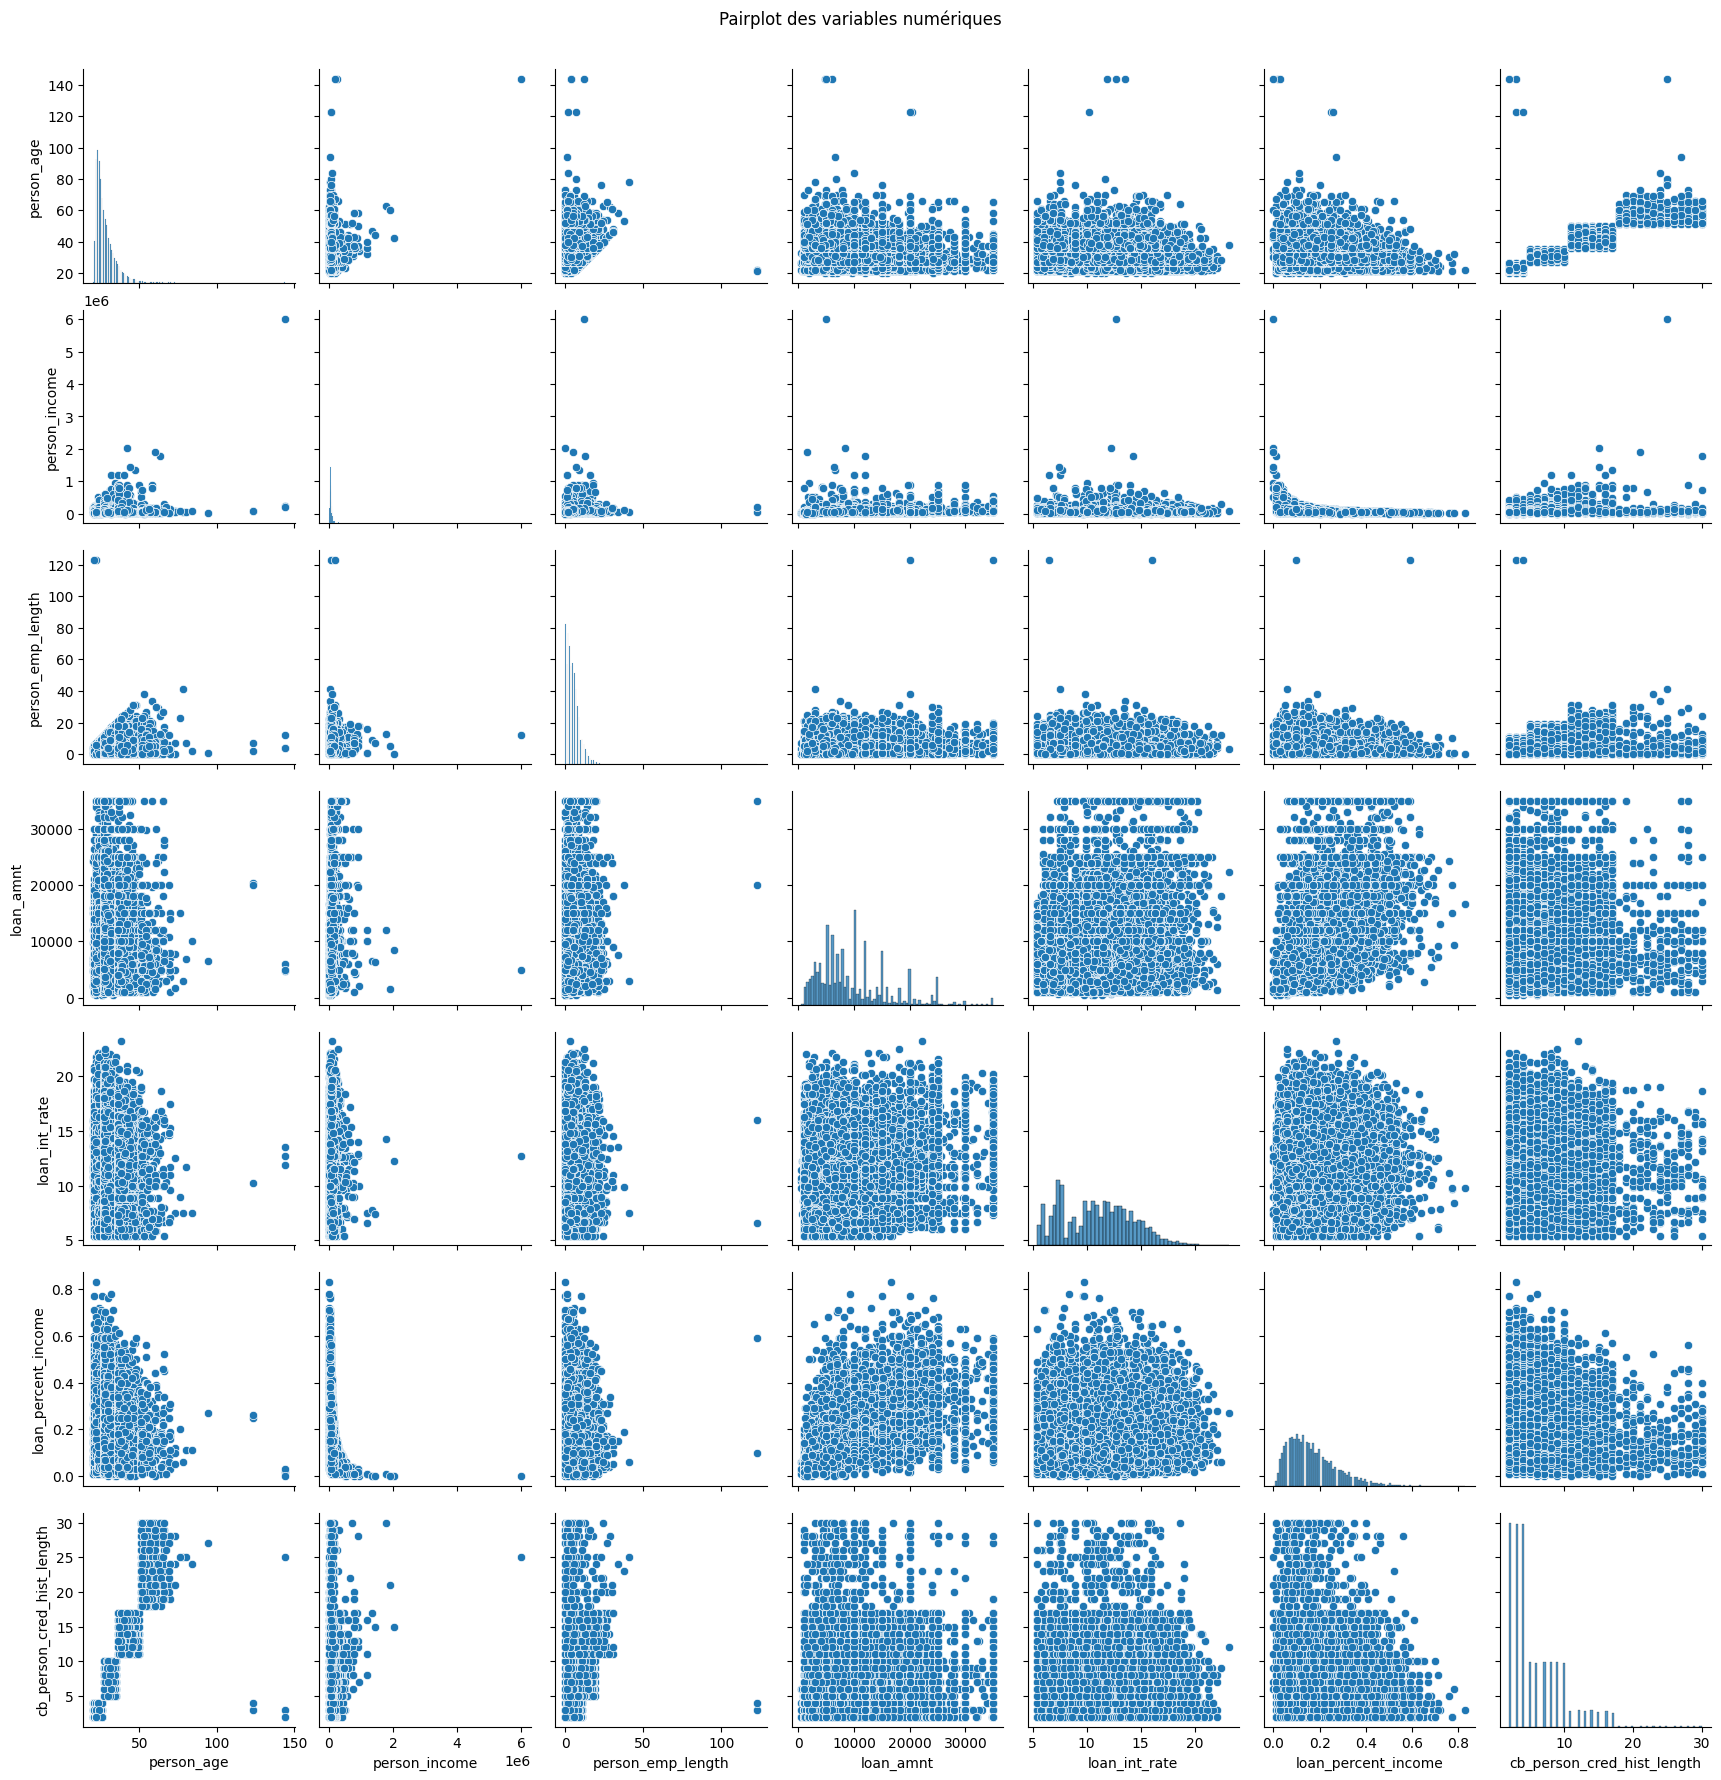

In [20]:
# 4. Pairplot des variables numériques
sns.pairplot(Data[numeric_features])
plt.suptitle("Pairplot des variables numériques", y=1.02)
plt.show()

## 3️- Construction du Modèles de Machine Learning

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [22]:
# Modèle de régression logistique
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Précision (Régression Logistique):", accuracy_score(y_test, y_pred_log))
print("Rapport de classification (Régression Logistique):\n", classification_report(y_test, y_pred_log))

Précision (Régression Logistique): 0.8417983734847322
Rapport de classification (Régression Logistique):
               precision    recall  f1-score   support

           0       0.86      0.96      0.90      5072
           1       0.75      0.43      0.55      1445

    accuracy                           0.84      6517
   macro avg       0.80      0.69      0.73      6517
weighted avg       0.83      0.84      0.83      6517



C:\Users\BELAJE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# Modèle d'arbre de décision
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("Précision (Arbre de Décision):", accuracy_score(y_test, y_pred_tree))
print("Rapport de classification (Arbre de Décision):\n", classification_report(y_test, y_pred_tree))

Précision (Arbre de Décision): 0.8844560380543195
Rapport de classification (Arbre de Décision):
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      5072
           1       0.73      0.77      0.75      1445

    accuracy                           0.88      6517
   macro avg       0.83      0.84      0.84      6517
weighted avg       0.89      0.88      0.89      6517



In [24]:
from sklearn.metrics import recall_score, f1_score, roc_auc_score

In [25]:
# Pour le modèle de Régression Logistique
accuracy_log = accuracy_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
auc_log = roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])

In [26]:
# Pour le modèle d'Arbre de Décision
accuracy_tree = accuracy_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
auc_tree = roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1])

In [27]:
print("Modèle                  Accuracy   Recall   F1-Score   AUC-ROC")
print("---------------------------------------------------------------")
print(f"Régression Logistique : {accuracy_log:.4f}    {recall_log:.4f}    {f1_log:.4f}    {auc_log:.4f}")
print(f"Arbre de Décision     : {accuracy_tree:.4f}    {recall_tree:.4f}    {f1_tree:.4f}    {auc_tree:.4f}")

Modèle                  Accuracy   Recall   F1-Score   AUC-ROC
---------------------------------------------------------------
Régression Logistique : 0.8418    0.4311    0.5472    0.8523
Arbre de Décision     : 0.8845    0.7709    0.7474    0.8439


• Parmi les modèles construits, l’arbre de décision obtient une meilleure précision, un rappel et un score F1 supérieurs par rapport à la régression logistique, indiquant qu’il détecte mieux les cas positifs. En revanche, la régression logistique présente un AUC légèrement plus élevé, ce qui refléter une meilleure séparation probabiliste.

Ces éléments indiquent que le pipeline de préparation est cohérent et que **l’arbre de décision** est mieux adapté pour la classification dans ce cas précis.

In [ ]:
import joblib

# Sauvegarder le modèle d'arbre de décision pour le déploiement
joblib.dump(tree_model, 'tree_model.pkl')

['tree_model.pkl']

## https://creditriskapp-b77gk72kgssgfmetxekbl7.streamlit.app/